<a href="https://colab.research.google.com/github/rahulrajput73194/Blog-Project-API-/blob/main/Copy_of_Patient_Health_Monitoring_Using_AI_ML(CHD_PREDICTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>



Identifying a patient's 10-year risk of certain diseases is the classification's main objective.

coronary heart disease in the future (CHD).

The dataset contains information on the patients. It entails

15 qualities and nearly 4,000 records.

#<b> 01 Installation  and Basic Imports

In [ ]:
# Installing Dataprep for quick EDA
!pip install -U dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.6/694.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of nltk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nltk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of nbconvert to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nbconvert to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You mig

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

#<b> 02 Import CSV dataset as  DataFrame and  Inspection

## <B> 2.1] Data validation

In [ ]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/framingham.csv")

# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# print first 5 rows of the dataset
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# print last 5 rows of the dataset
df.tail()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [ ]:
# number of rows and columns in the dataset
df.shape

(4240, 16)

This dataset contains total 4240 rows as records and 16 columns as features.
Here we have validated all available variables, no any specific change after validation. The columns/ features in this dataset are as follows:

**Demographic:**
*  **Sex**: male or female("1" or "0")

*  **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **currentSmoker**: whether or not the patient is a current smoker ("YES means 1" or "NO means 0")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)


**Medical(history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)


**Predict variable (desired target)**
* **10-year risk of coronary heart disease CHD**: (binary: “1”, means “Yes”, “0” means “No”) -DV

**Variables:**

Each attribute is a potential risk factor.
They consists demographic, behavioral, and medical risk factors.

## <B> 2.2] Missing data Analysis and Data Cleaning

 Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [ ]:
# Importing missing data analysis toolkit
from dataprep.eda import plot_missing

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (/usr/local/lib/python3.11/dist-packages/markupsafe/__init__.py)

In [ ]:
plot_missing(df)

NameError: name 'plot_missing' is not defined

In [ ]:
# checking for missing values
df.isnull().sum()

,0
Sex,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


 The next single-line code will visualize the location of missing values.

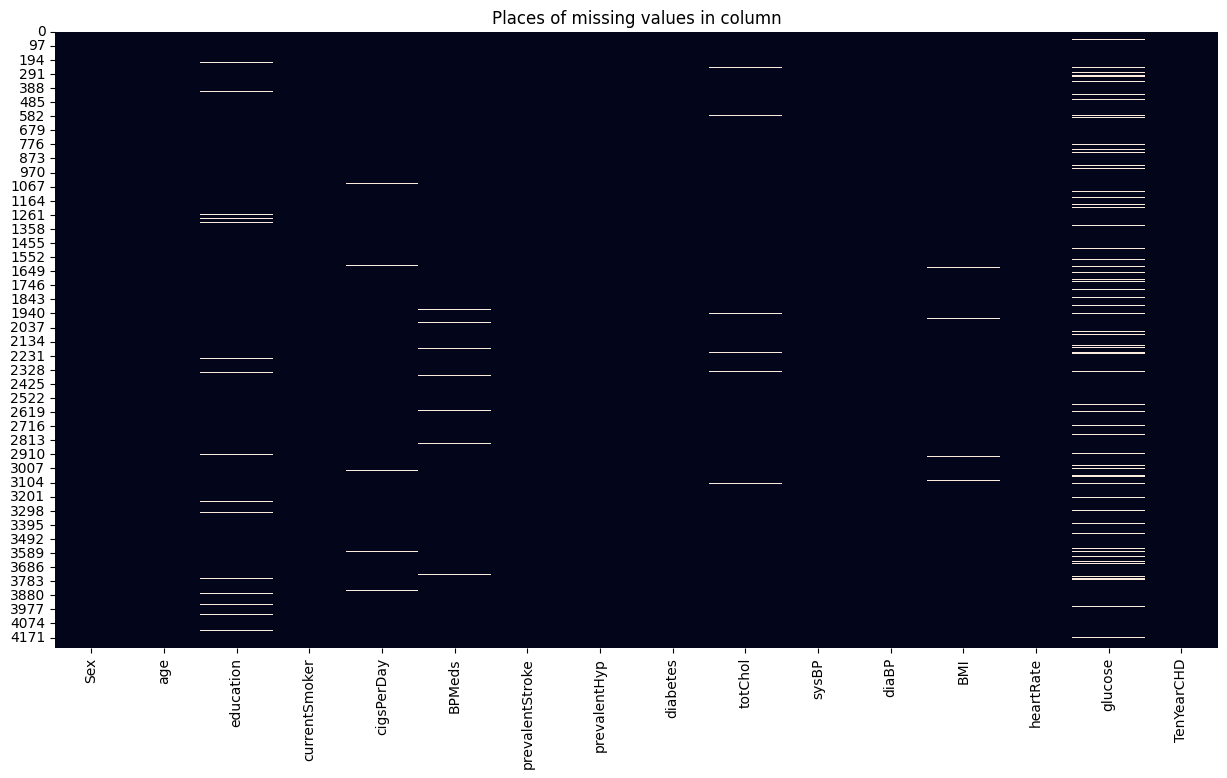

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(df.isnull(), cbar=False, ax=ax)
plt.show()

In [ ]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


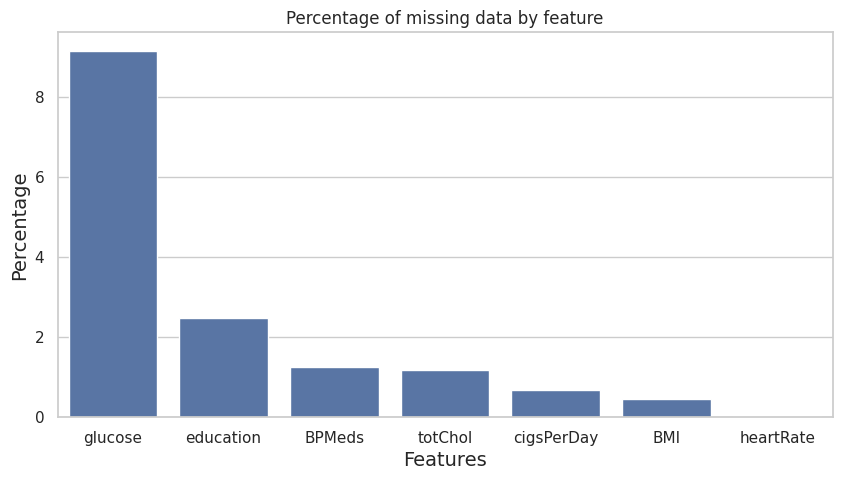

In [ ]:
# Visualizing the percentage of missing data
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [ ]:
# let's count the all rows which are having missing values
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# checking missing value percentage
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


At **8.97%**, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

Since the missing entries account for only **14%** of the total data so, we can drop these entries without losing alot of data.

In [ ]:
# Excluding the missing values
df.dropna(axis=0,inplace=True)

In [ ]:
# Now checking for missing values
df.isnull().any()

,0
Sex,False
age,False
education,False
currentSmoker,False
cigsPerDay,False
BPMeds,False
prevalentStroke,False
prevalentHyp,False
diabetes,False
totChol,False


In [ ]:
# Checking for any duplicate values
len(df[df.duplicated()])

0

Dropping education and id columns because it has no correlation with heart disease.

In [ ]:
# Removing columns 'id' & 'education' if they exist
if 'education' in df.columns:
    df.drop(['education'], axis=1, inplace=True)
# Display the first few rows of the updated DataFrame
df.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


After cleaning this dataset we have total 15 features for exploratory data analysis. Some Records we have dropeed due as data was missing.

# <b> 03 Exploratory Data Analysis

## <b> 3.1] Data Description

In [ ]:
# statistical measures about the data
df.describe()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The features described in the above data set are:

1. **Count:** tells us the number of NoN-empty rows in a feature.

2. **Mean:** tells us the mean value of that feature.

3. **Std:** tells us the Standard Deviation Value of that feature.

4. **Min:** tells us the minimum value of that feature.

5. **25%, 50%, and 75%:** are the percentile/quartile of each features.

6. **Max:** tells us the maximum value of that feature.

## <b> 3.2] Integer Treatment

In [ ]:
# checking the distribution
df['Sex'].value_counts()

,Sex
0,2035
1,1623


In [ ]:
# checking the distribution
df['currentSmoker'].value_counts()

,currentSmoker
0,1869
1,1789


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   currentSmoker    3658 non-null   int64  
 3   cigsPerDay       3658 non-null   float64
 4   BPMeds           3658 non-null   float64
 5   prevalentStroke  3658 non-null   int64  
 6   prevalentHyp     3658 non-null   int64  
 7   diabetes         3658 non-null   int64  
 8   totChol          3658 non-null   float64
 9   sysBP            3658 non-null   float64
 10  diaBP            3658 non-null   float64
 11  BMI              3658 non-null   float64
 12  heartRate        3658 non-null   float64
 13  glucose          3658 non-null   float64
 14  TenYearCHD       3658 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 457.2 KB


In [ ]:
df.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## <b> 3.3] Dataprep Report

In [ ]:
# Imports for EDA from Dataprep
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.datasets import load_dataset

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (/usr/local/lib/python3.11/dist-packages/markupsafe/__init__.py)

In [ ]:
# plot(df) # For analysing distributions

In [ ]:
from dataprep.eda import create_report
report = create_report(df, title='My Report')

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (/usr/local/lib/python3.11/dist-packages/markupsafe/__init__.py)

In [ ]:
# report

In [ ]:
# report.save()

To view report generated [click here](https://drive.google.com/drive/folders/17TorpF2fkfUiF4xV2yzo4n5GHL5qhaHg)

## <b> 3.4] Feature Analysis

Target Variable Analysis:

In [ ]:
# checking the distribution of Target Variable
df.TenYearCHD.value_counts()

,TenYearCHD
0,3101
1,557


There are 2483 patients without heart disease and 444 patients with the disease.
* 1 --> Person have risk of coronary heart disease
* 0 --> Person do not have risk of coronary heart disease

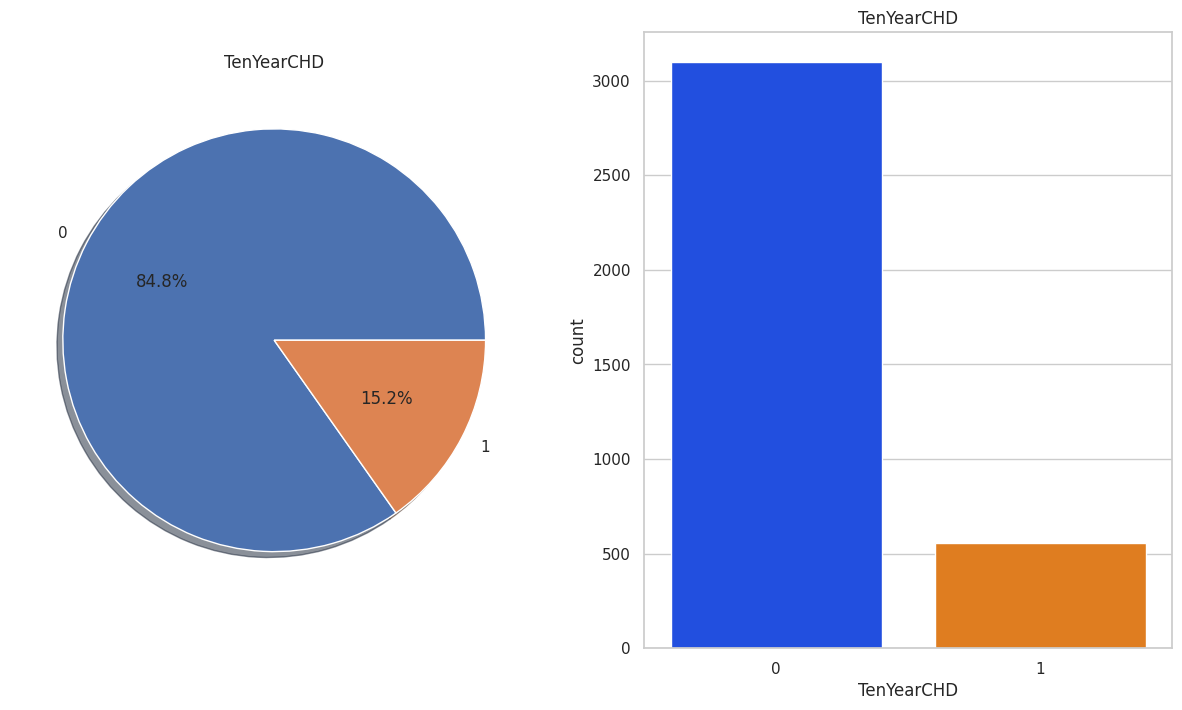

In [ ]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(15,8))
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')
sns.countplot(x='TenYearCHD', data=df, ax=ax[1],palette ='bright')
ax[1].set_title('TenYearCHD')
plt.show()

We can see above that we have the imbalanced data set as the number of people without the disease greatly exceeds the number of people with the disease.
* **15.2 %** out of total people have Cardiovascular Risk.
* **84.8 %** of total people are risk free.

## <b> 3.5] Feature Selection




In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

The classes in the **sklearn.feature_selection** module can be used for **feature selection/dimensionality reduction** on sample sets, either to **improve estimators’ accuracy scores** or to **boost their performance** on very high-dimensional datasets.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Example DataFrame (replace this with your actual data)
# df = ...

# Define features and target
X = df.iloc[:, 0:14]  # Independent columns
y = df.iloc[:, -1]    # Target column

# Select top 10 features using Chi-squared test
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

# Create DataFrame for scores and feature names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate scores and feature names for visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Display the top 11 features
print(featureScores.nlargest(11, 'Score'))


           Specs       Score
9          sysBP  669.136021
13       glucose  379.914235
1            age  296.200344
8        totChol  250.490205
3     cigsPerDay  155.798307
10         diaBP  142.521814
6   prevalentHyp   82.845455
7       diabetes   31.067621
4         BPMeds   28.191569
0            Sex   17.107751
11           BMI   15.785436


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,669.136021
13,glucose,379.914235
1,age,296.200344
8,totChol,250.490205
3,cigsPerDay,155.798307
10,diaBP,142.521814
6,prevalentHyp,82.845455
7,diabetes,31.067621
4,BPMeds,28.191569
0,Sex,17.107751


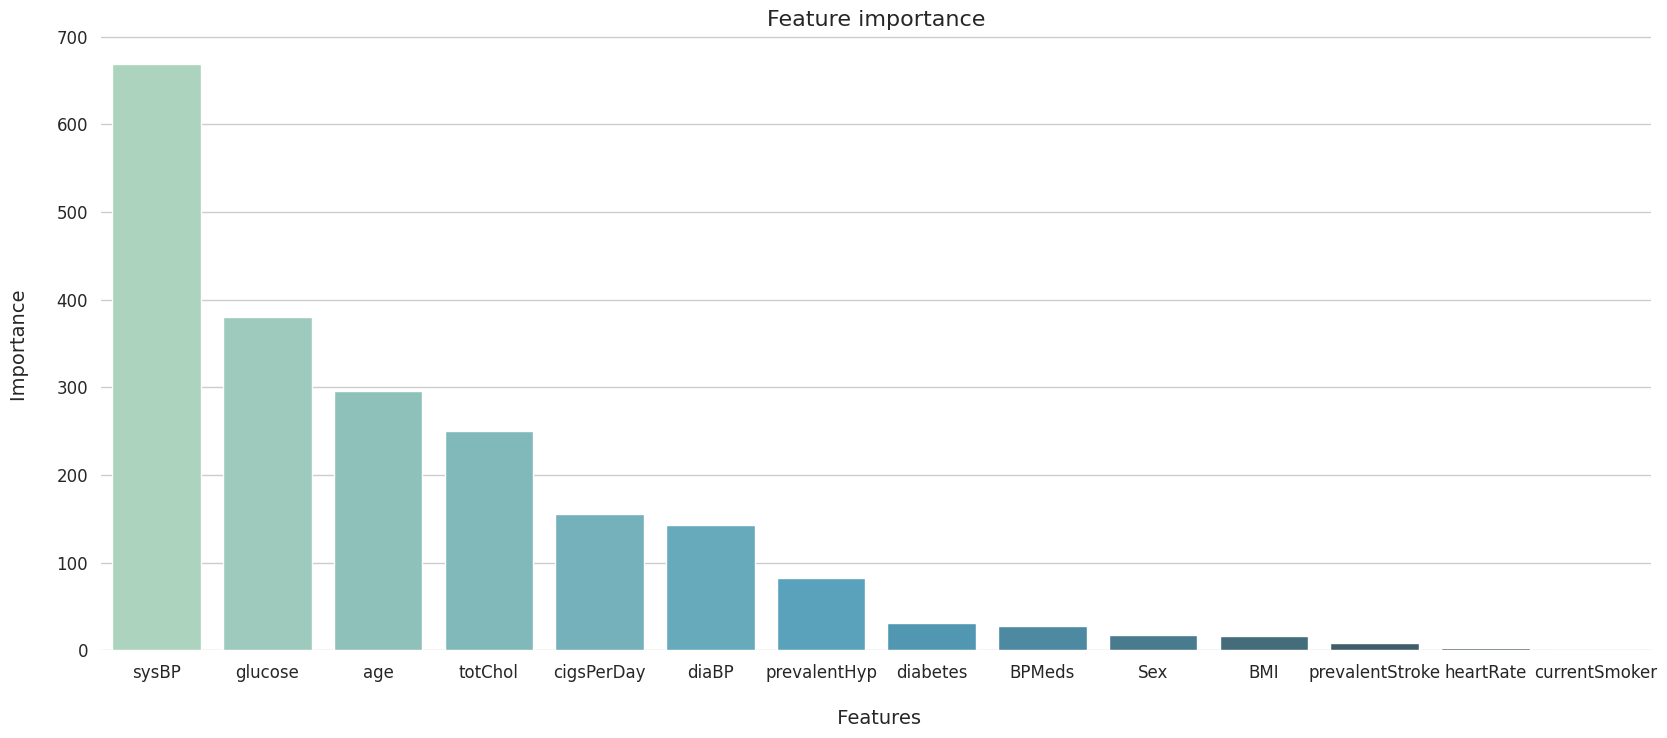

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From above visualisation we can consider features such as `sysBP`, `glucose`, `totChol`, `age`, `cigsPerDay`, `diaBP` who have very scores in model creation.

## <b> 3.6] Attack on Targate variable

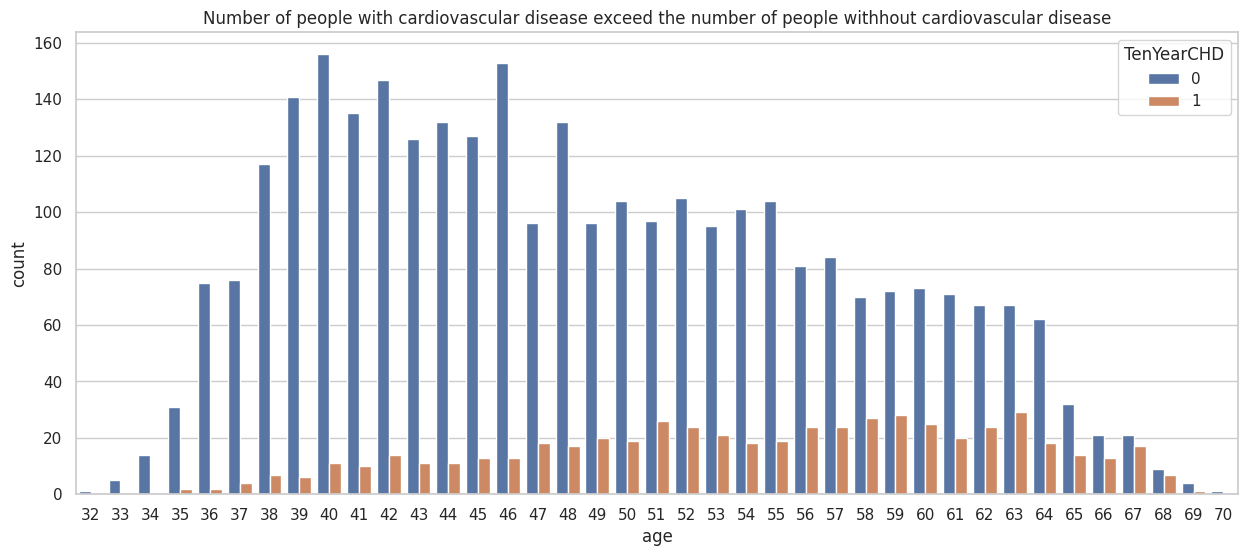

In [ ]:
# Visualising the target and age variable
plt.figure(figsize=[15,6])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(data=df, x='age', hue='TenYearCHD');

As we can see in above plot the people with the highest risk of developing heart disease are between the ages of **51 and 63.**

Because the number of sick people generally increases with age.

### **Categorical variable comparisons**.

 Plotting categorical variables with respect to target variable

In [ ]:
list1 = ["Sex","diabetes","currentSmoker","prevalentHyp","BPMeds"]

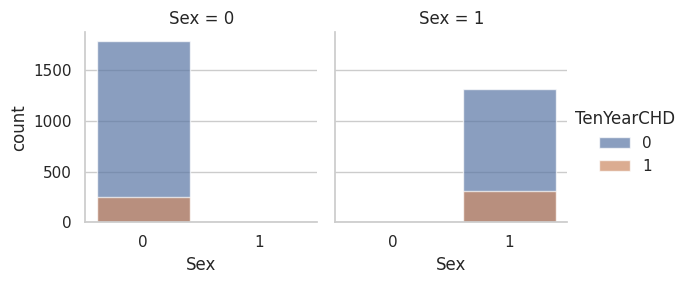

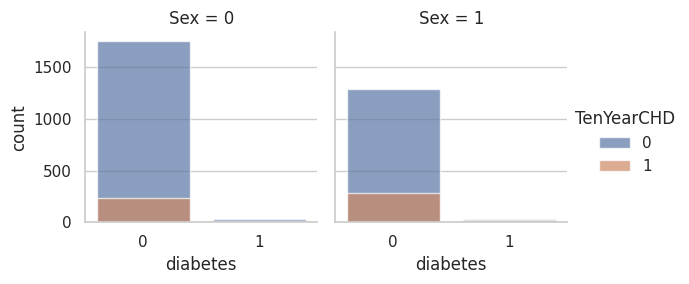

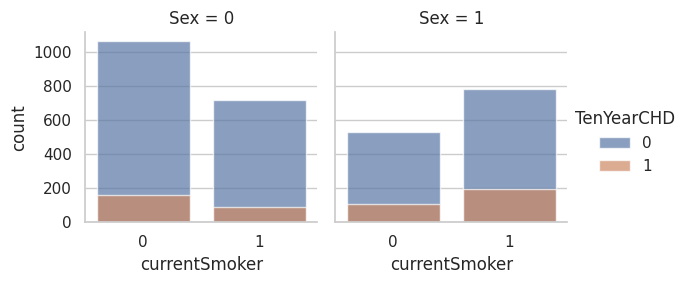

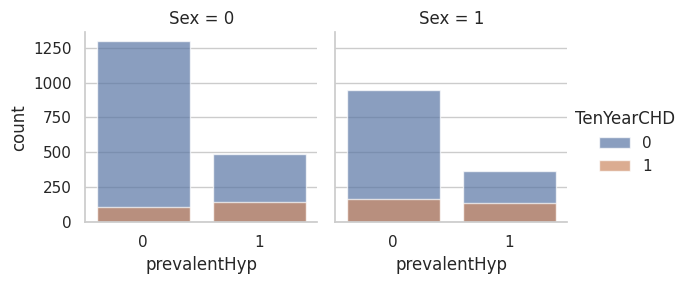

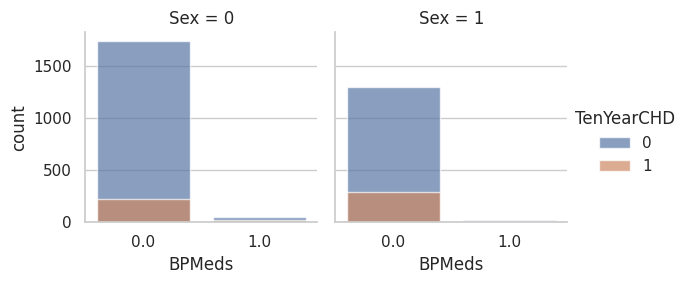

In [ ]:
for item in list1:
  g = sns.FacetGrid(df, col="Sex", hue="TenYearCHD")
  g.map(sns.countplot, item , alpha=.7)
  g.add_legend();

From the above categorical variables comparison plot we can conclude that,

*   Slightly more males are suffering from Cardiovascular heart disease than females.
*   The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
*   The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.
*   The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication.

# <b> 04 Dealing With Outliers

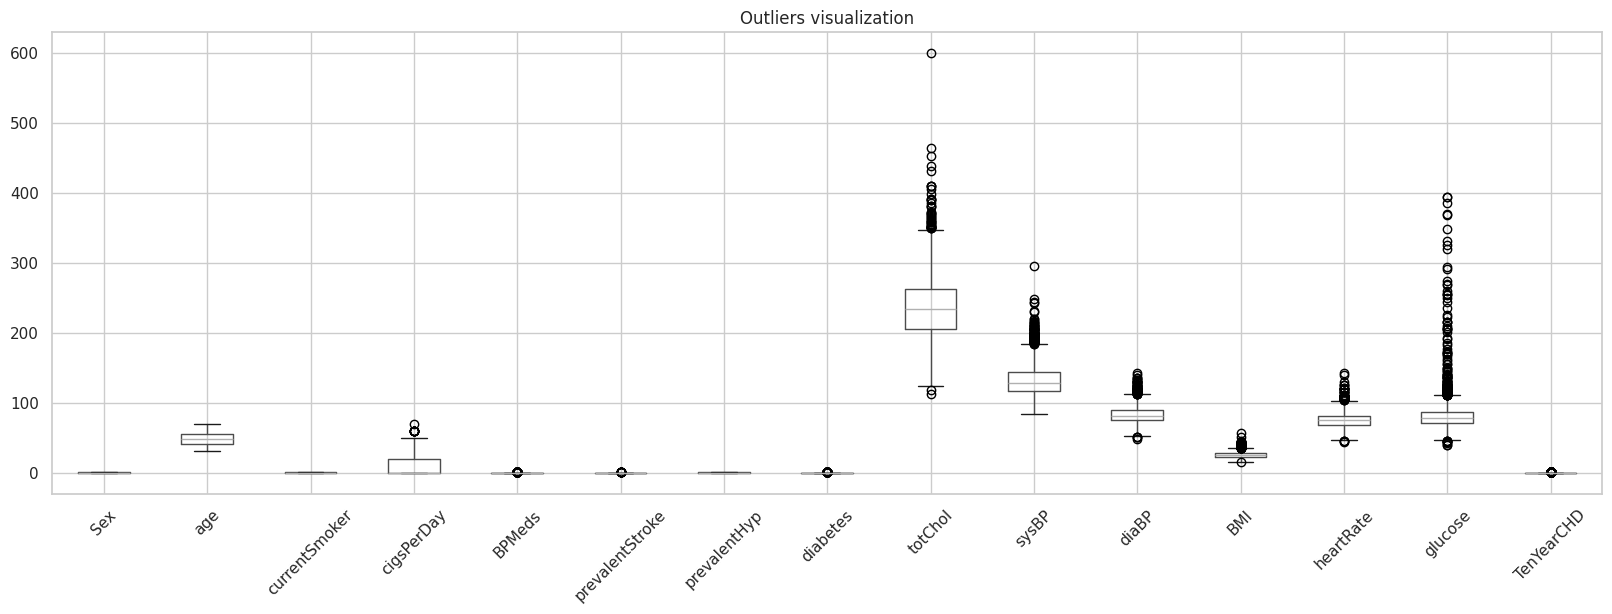

In [ ]:
# Visualize univariate outliers
# Create a plot
fig, ax = plt.subplots(figsize=(20,6))
plt.title("Outliers visualization")
df.boxplot()
# Rotate the x-axis tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Some Major outliers we can see in the `totChol`, `glucose` column we will deal with them by removing them.

In [ ]:
# Select the columns to include in the new DataFrame
columns = ['totChol', 'sysBP', 'glucose', 'cigsPerDay']

# Create the new DataFrame
boxplot_df = df.loc[:, columns]

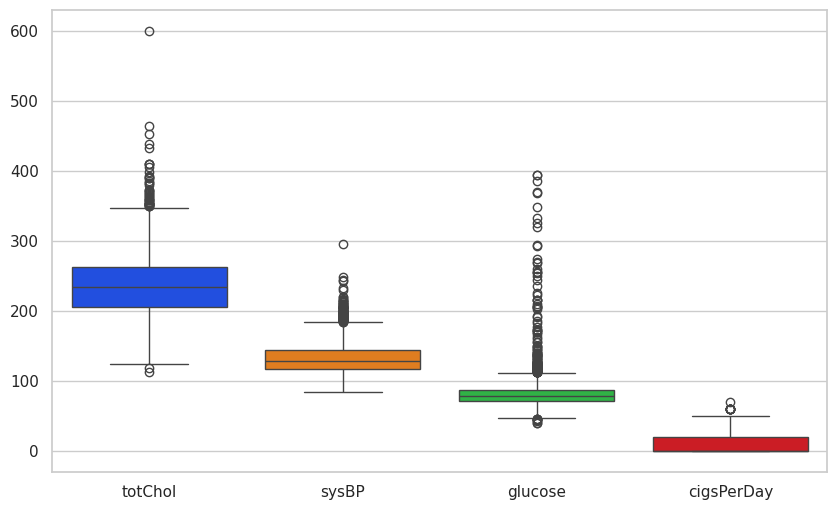

In [ ]:
sns.boxplot(data=boxplot_df, palette= "bright");

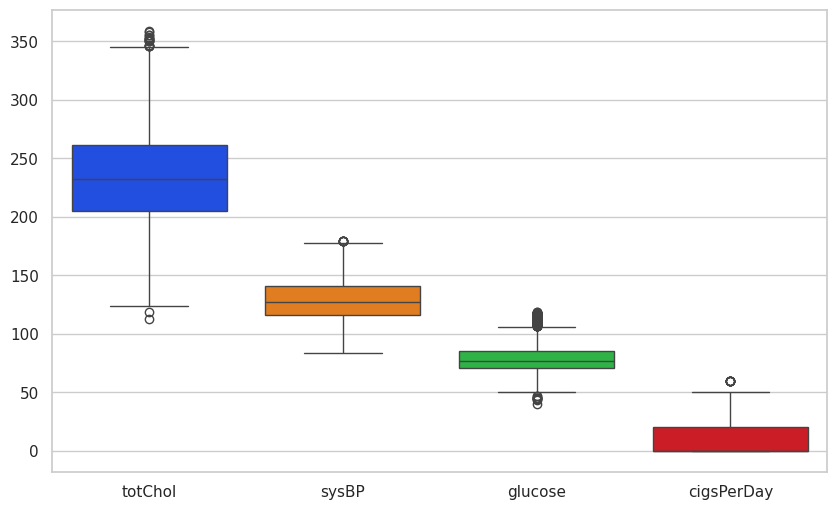

In [ ]:
# Reomove outliers based on above boxplot
df = df[(df.totChol < 360)]
df = df[(df.sysBP < 180)]
df = df[(df.glucose < 120)]
df = df[(df.cigsPerDay < 65)]

# Select the columns to include in the new DataFrame
columns = ['totChol', 'sysBP', 'glucose', 'cigsPerDay']

# Create the new DataFrame
boxplot_df_after = df.loc[:, columns]

# Verify outlier removal
sns.boxplot(data=boxplot_df_after, palette= "bright");

Now data is free of outliers lets move towards our correlation Analysis

# <b> 05 Correlation Analysis

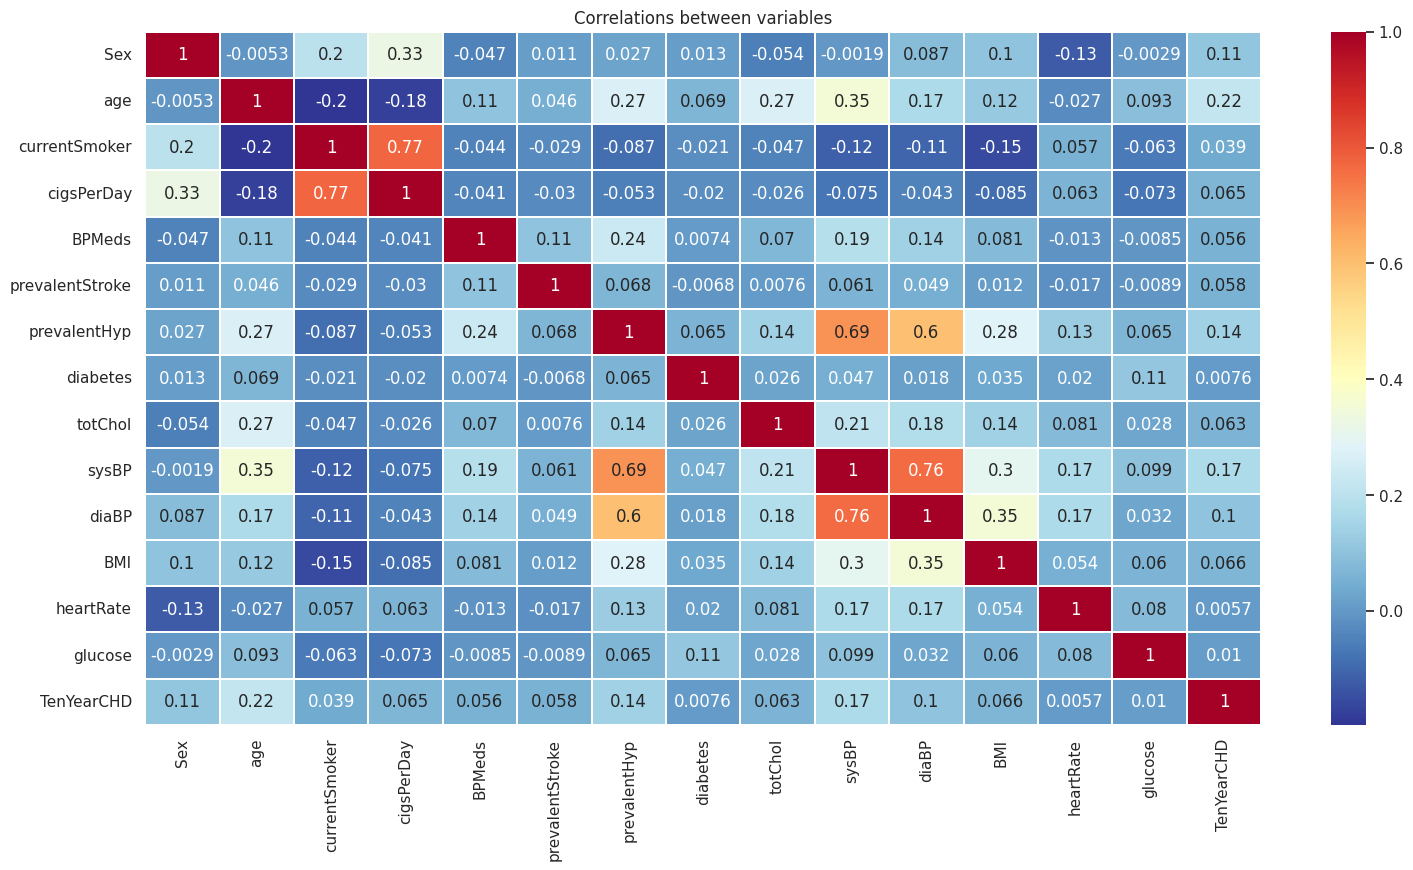

In [ ]:
# Correlations between variables
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

In [ ]:
from dataprep.eda import plot_correlation
plot_correlation(df)

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (/usr/local/lib/python3.11/dist-packages/markupsafe/__init__.py)

In [ ]:
plot_correlation(df, "TenYearCHD")

NameError: name 'plot_correlation' is not defined

**From the above correlation plot we can conclude that**,



*   There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

*   Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model.

**These includes:**

*  Blood glucose and diabetes;
*  systolic and diastolic blood pressures;
*  cigarette smoking and the number of cigarretes smoked per day.

Therefore we need to carry out feature selection to pick the best features.

# <b> 06 Feature Engineering

## <b> 6.1] Selection of Top Features

**Tree-based: SelectFromModel**

**SelectFromModel** is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.


Here,

We have used RandomForest() to select features based on feature importance.
We calculate feature importance using node impurities in each decision tree.

In Random forest, the final feature importance is the average of all decision tree feature importance.

In [ ]:
#define the features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [ ]:
# Important or top Features
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

The top features are:

1. Age
2. Total cholesterol
3. Systolic blood pressure
4. Diastolic blood pressure
5. BMI
6. Heart rate
7. Blood glucose

## <b> 6.2] Pairplot for Top Features

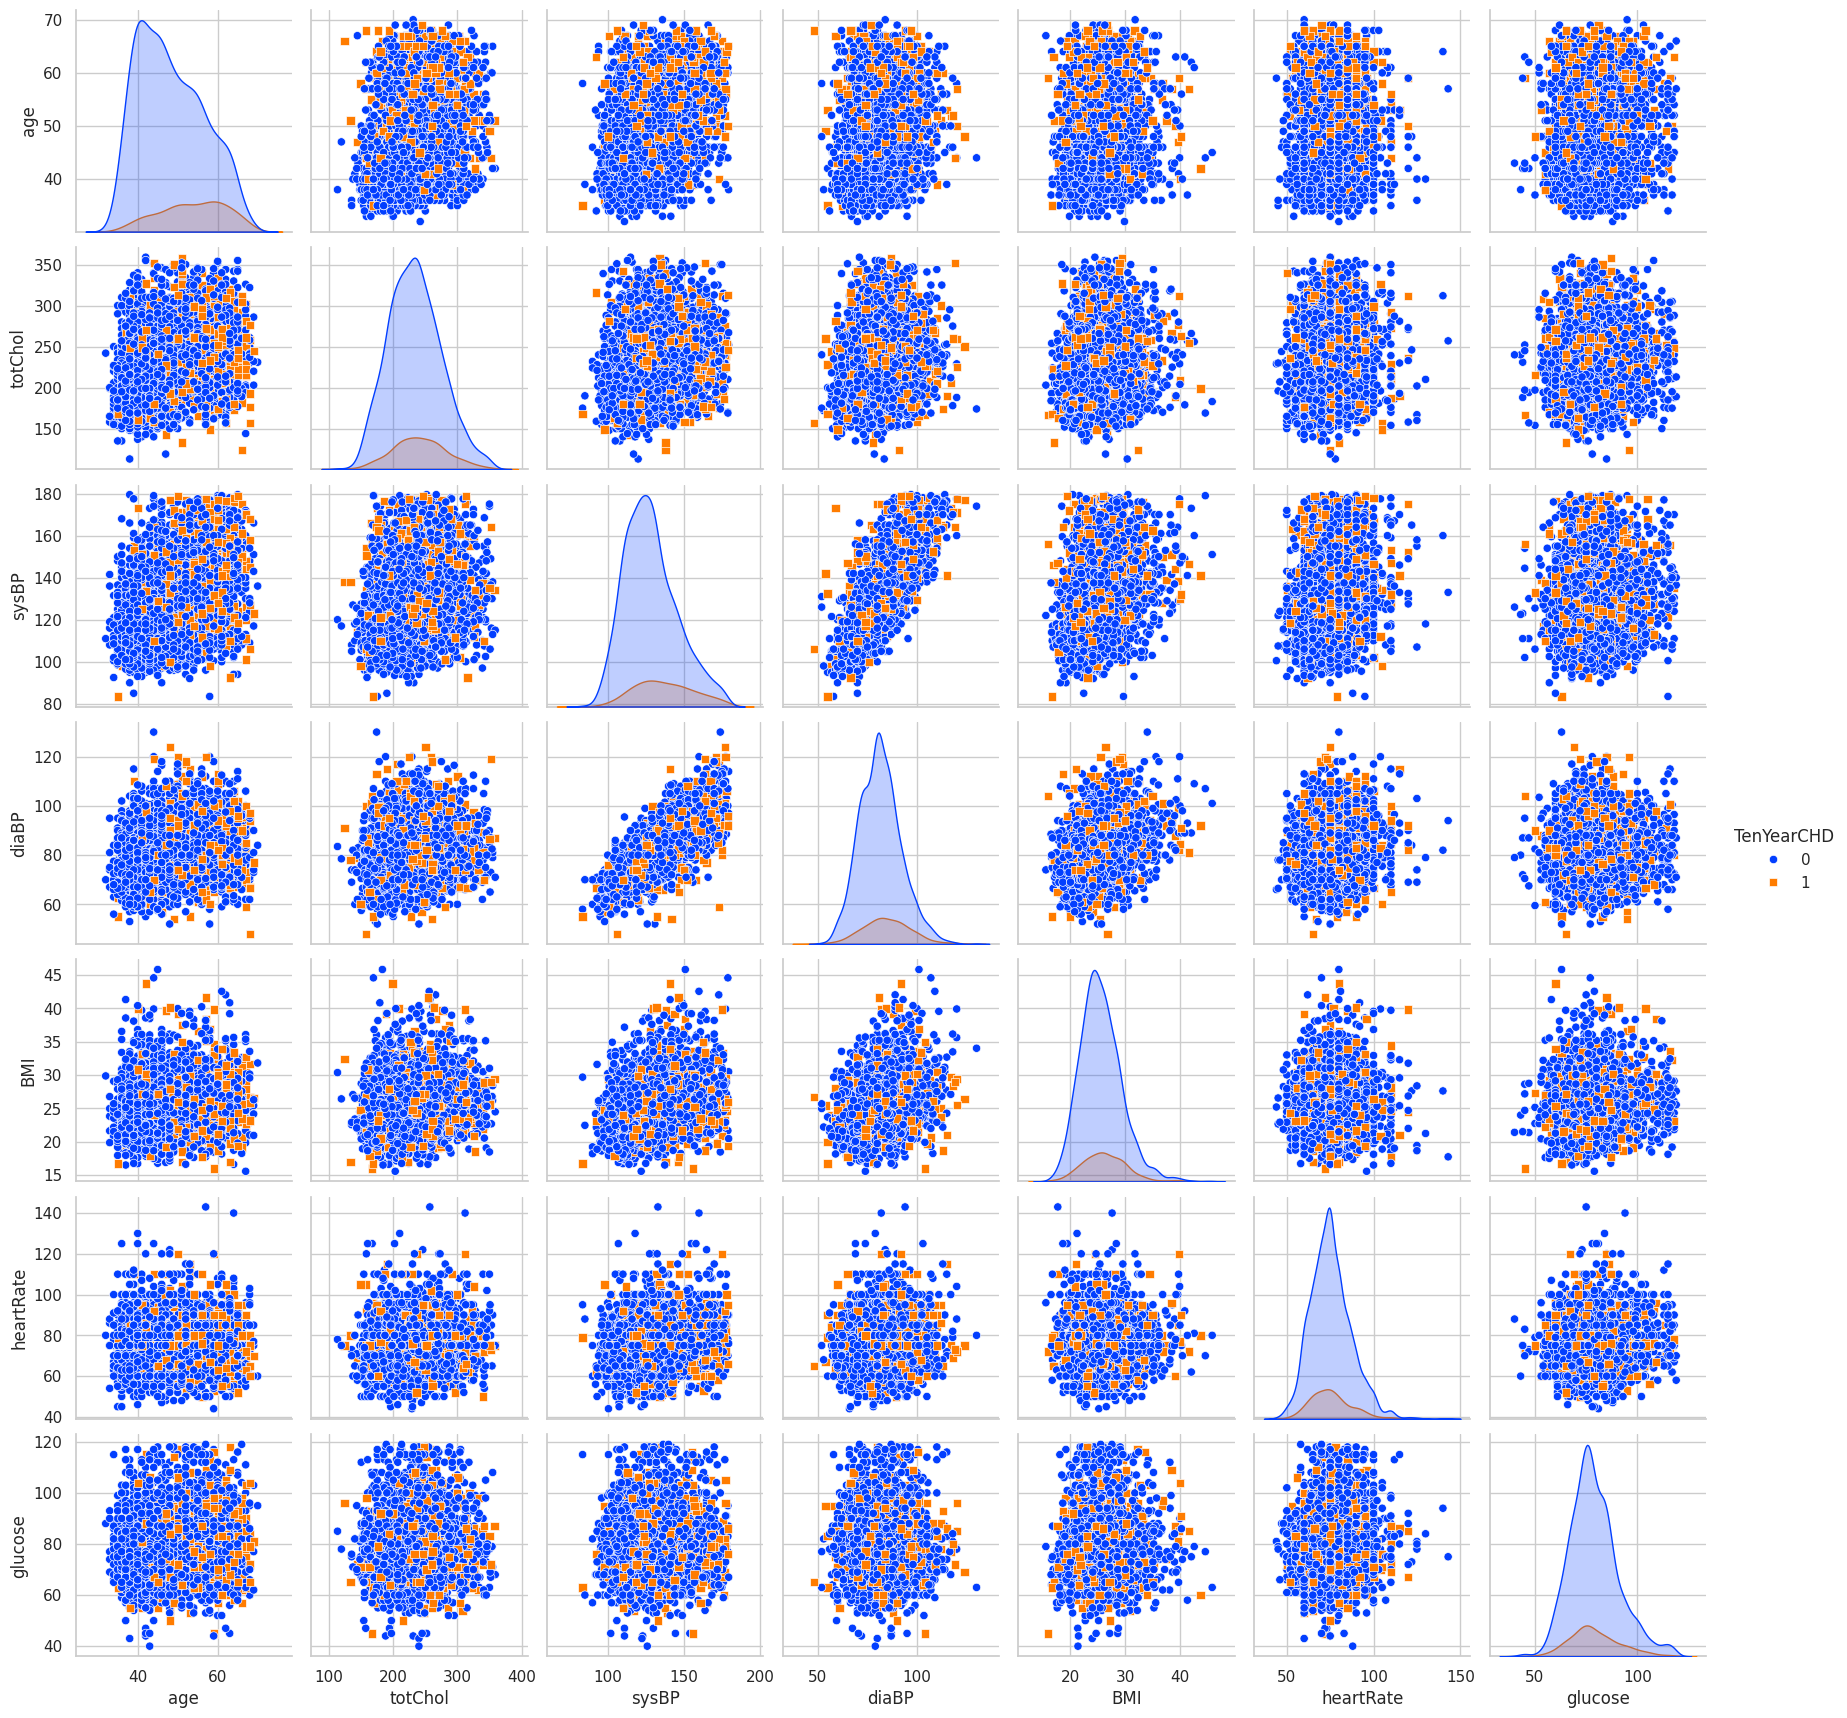

In [ ]:
# Plotting pairplot of top features vs target variable
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = embeded_rf_feature, palette='bright');

#<b> 07 Preparing dataset for modeling

## <b> 7.1] SMOT

Since our dataset is imbalanced i.e for every positive case there are about 5-6 negative cases. We may end up with a classifier that is biased to the negative cases. The classifier may have a high accuracy but poor a precision and recall.

To handle this problem we will balance the dataset using the **Synthetic Minority Oversampling Technique (SMOTE).**

**SMOTE** :

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors.

**SMOTE** algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df[embeded_rf_feature]
y = df.iloc[:,-1]
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3400
Resampled dataset shape 5886


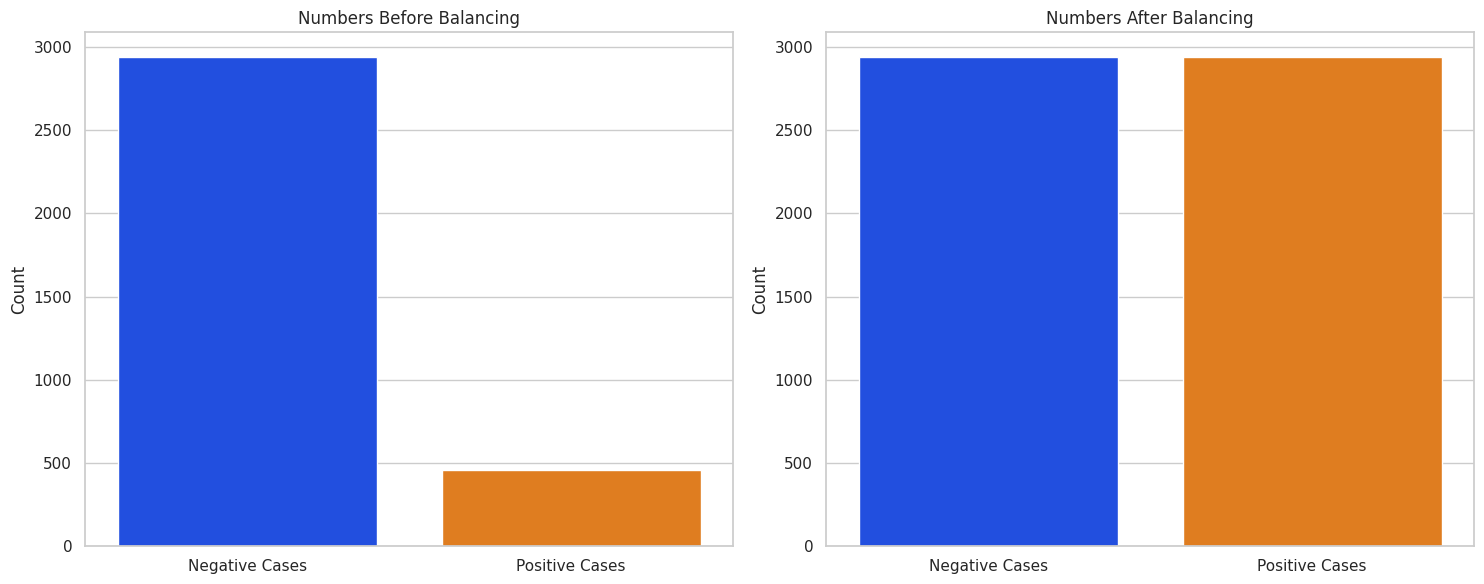

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Labels for the bar plots
labels = ["Negative Cases", "Positive Cases"]

# Count occurrences in y and y_smote
counts_before = list(dict(Counter(y)).values())  # Ensure y is defined
counts_after = list(dict(Counter(y_smote)).values())  # Ensure y_smote is defined

# Plotting
plt.figure(figsize=(15, 6))

# Before Balancing
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=counts_before, palette='bright')  # Use x and y as keyword arguments
plt.title("Numbers Before Balancing")
plt.ylabel("Count")

# After Balancing
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=counts_after, palette='bright')  # Use x and y as keyword arguments
plt.title("Numbers After Balancing")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


**As seen after applying SMOTE, the new dataset is much more balanced.**

## <b> 7.2] Split

In [ ]:
# First let's create our new dataset
df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
df_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
X_new = df_new[embeded_rf_feature]
y_new = df_new["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 4708 records and Testing features have 1178 records.


## <b> 7.3] Metrices

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

* **GridSearchCV** implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

* **confusion_matrix** to **evaluate** the **accuracy** of a classification.

* **classification_report** builds a **text report** showing the **main classification metrics**.

* For evaluation of classification model scores we have considered accuracy_score, f1_score, recall_score, prescision_score, roc_auc_score, roc_curve.



#<b> 08 Classification Models

The two algorithms that we will be using are:

1. **Logistic Regression**
2. **Support Vector Machine**


Here, we will be using **GridsearchCV** search algorithm for above algorithms

In [ ]:
M_list =[]

In [ ]:
# Empty lists for storing model scores
Test_accuracy_score = []
Precision_score = []
Recall_score = []
F1_score = []
AUC = []

In [ ]:
def apply_model(model, X_train, y_train, X_test, y_test):

  model.fit(X_train, y_train)

  model.best_params_

  print('Best Parameters for this model are : ',model.best_params_)

  model_predict = model.predict(X_test)

  model_accuracy = accuracy_score(y_test, model_predict)

  # Use the built-in round function instead of the .round method
  test_accuracy = round(model_accuracy, 2)
  precision = round(precision_score(y_test, model_predict), 2)
  recall = round(recall_score(y_test, model_predict), 2)
  roc_auc = round(roc_auc_score(y_test, model_predict), 2)

  Test_accuracy_score.append(test_accuracy)
  Precision_score.append(precision)
  Recall_score.append(recall)



  print(f"Using above regression model we get an accuracy of {round(model_accuracy*100, 2)}%")
  print('Train ROC-AUC score : ', model.best_estimator_.score(X_train,y_train))
  print('Test ROC-AUC score : ', model.best_estimator_.score(X_test,y_test))

  # confusion matrix for Model

  cm = confusion_matrix(y_test, model_predict)
  conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
  plt.figure(figsize = (8,5))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

  print('\n')

  print('Classification Report For This model is as follows')

  print(classification_report(y_test, model_predict))

  return

In [ ]:
def error_plot(model, X_train, y_train, X_test, y_test):

  # ROC curve and AUC
  probs = model.predict_proba(X_test)

  # keep probabilities for the positive outcome only
  probs = probs[:, 1]

  # calculate AUC
  log_auc = roc_auc_score(y_test, probs)
  auc = log_auc.round(2)

  AUC.append(auc)

  # calculate roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)

  # plot curve
  sns.set_style('whitegrid')
  plt.figure(figsize=(10,6))
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr, marker='.')
  plt.ylabel('True positive rate')
  plt.xlabel('False positive rate')
  plt.title(f"AUC = {round(log_auc,3)}")
  plt.show()

  return

## <b> 8.1] Logistic Regression

**Logistic regression** aims to measure the relationship between a categorical dependent variable and one or more independent variables (usually continuous) by plotting the dependent variables' probability scores.

In [ ]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')
M_list.append('logistic_clf')


Best Parameters for this model are :  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Using above regression model we get an accuracy of 64.94%
Train ROC-AUC score :  0.655267629566695
Test ROC-AUC score :  0.6494057724957555


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       582
           1       0.65      0.65      0.65       596

    accuracy                           0.65      1178
   macro avg       0.65      0.65      0.65      1178
weighted avg       0.65      0.65      0.65      1178



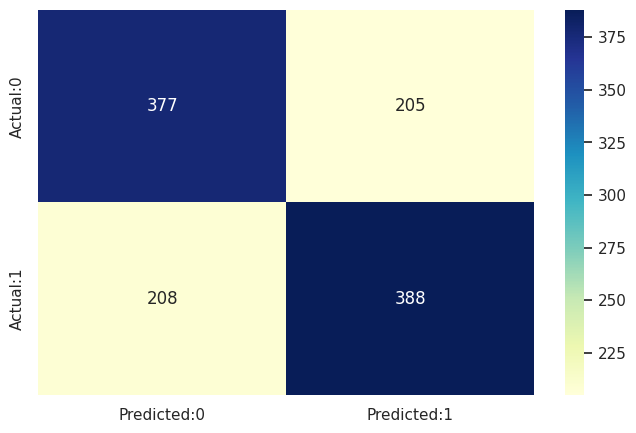

In [ ]:
#%%time

apply_model(logistic_clf, X_train, y_train, X_test, y_test)

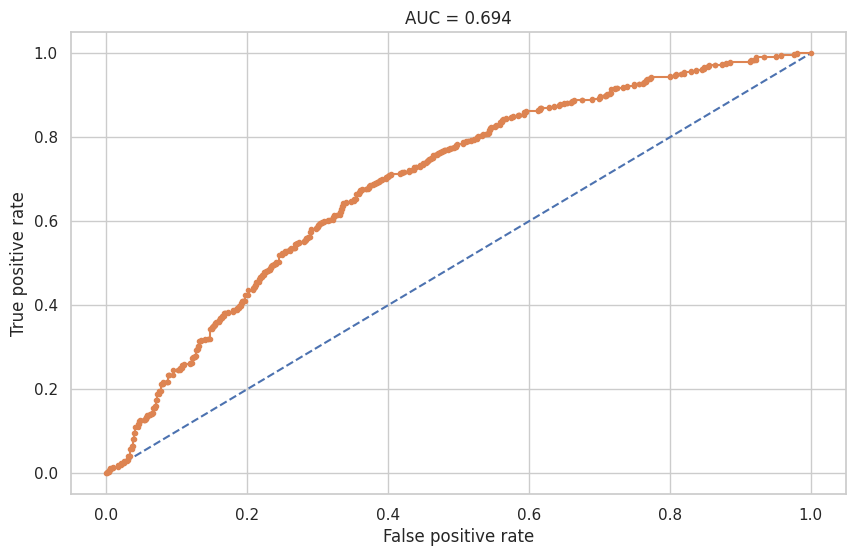

In [ ]:
error_plot(logistic_clf, X_train, y_train, X_test, y_test)

## <b> 8.2] Random Forest

**Random forests** are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

In [ ]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')
M_list.append('random_clf')

Best Parameters for this model are :  {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}
Using above regression model we get an accuracy of 69.44%
Train ROC-AUC score :  0.7266355140186916
Test ROC-AUC score :  0.6943972835314092


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       582
           1       0.69      0.71      0.70       596

    accuracy                           0.69      1178
   macro avg       0.69      0.69      0.69      1178
weighted avg       0.69      0.69      0.69      1178

CPU times: user 2min 35s, sys: 300 ms, total: 2min 36s
Wall time: 2min 38s


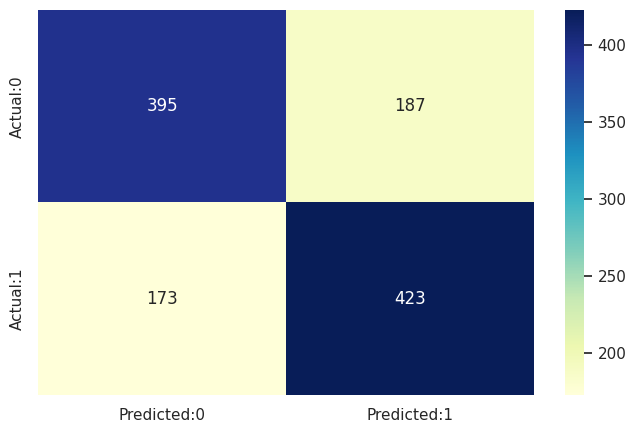

In [ ]:
%%time

apply_model(random_clf, X_train, y_train, X_test, y_test)

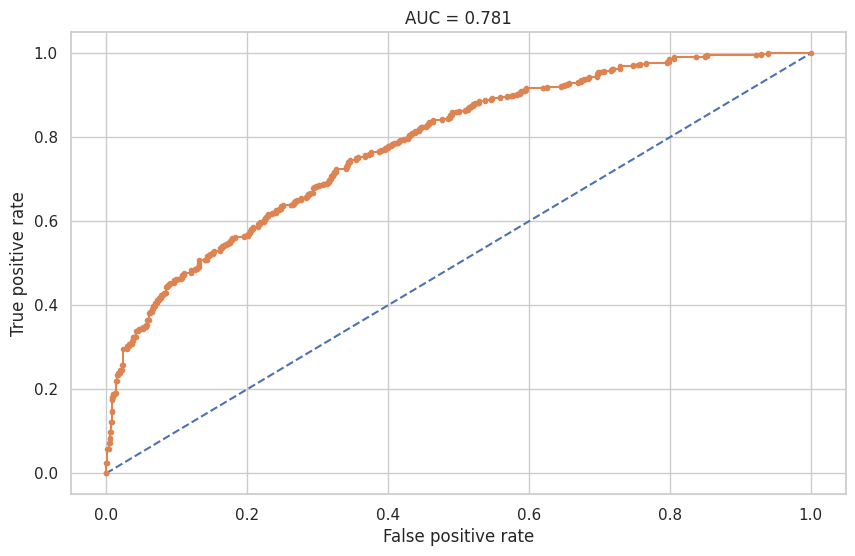

In [ ]:
error_plot(random_clf, X_train, y_train, X_test, y_test)

## <b> 8.3] XG Boost

XGBoost stands for eXtreme Gradient Boosting. The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms

In [ ]:
# Importing required libraries
from xgboost import XGBClassifier

In [ ]:
params_xgb = {
    'max_depth': range (2, 12, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')
M_list.append('xgb_clf')

Best Parameters for this model are :  {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}
Using above regression model we get an accuracy of 68.42%
Train ROC-AUC score :  0.7259983007646559
Test ROC-AUC score :  0.6842105263157895


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       582
           1       0.68      0.70      0.69       596

    accuracy                           0.68      1178
   macro avg       0.68      0.68      0.68      1178
weighted avg       0.68      0.68      0.68      1178

CPU times: user 2min 34s, sys: 313 ms, total: 2min 35s
Wall time: 2min 35s


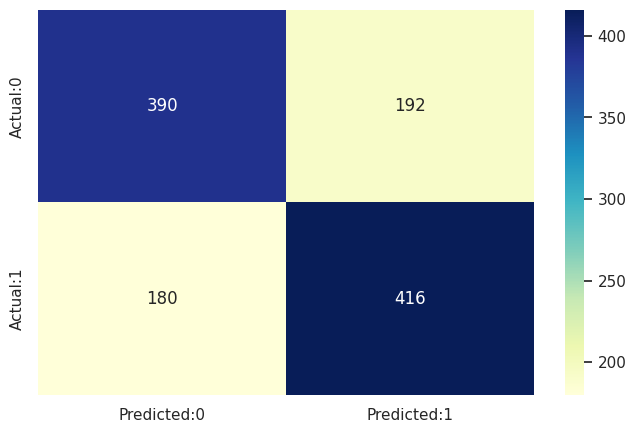

In [ ]:
%%time

apply_model(random_clf, X_train, y_train, X_test, y_test)

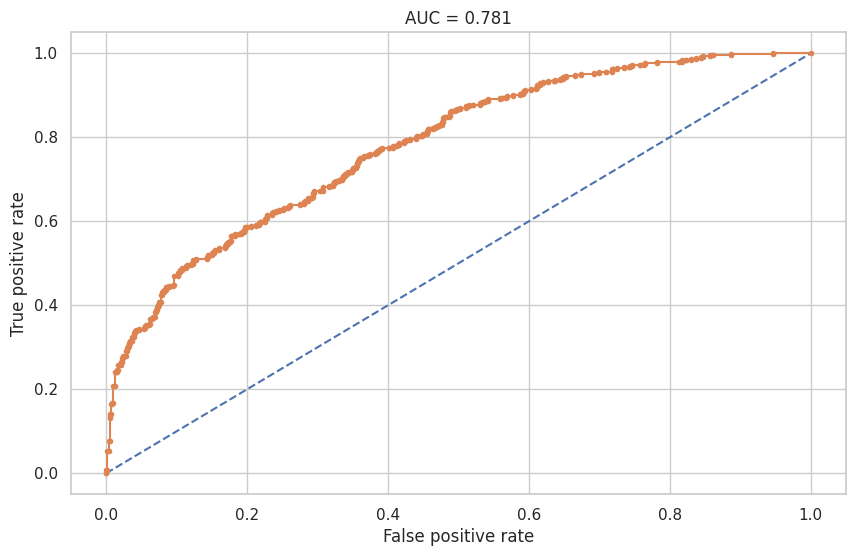

In [ ]:
error_plot(random_clf, X_train, y_train, X_test, y_test)

## <b> 8.4] Support Vector Machine

**Support vector machines (SVMs)** are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems.

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

In [ ]:
# Importing required libraries

from sklearn.svm import SVC

In [ ]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)
M_list.append('svm_clf')

Best Parameters for this model are :  {'C': 10, 'gamma': 0.01}
Using above regression model we get an accuracy of 94.23%
Train ROC-AUC score :  1.0
Test ROC-AUC score :  0.9422750424448217


Classification Report For This model is as follows
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       582
           1       0.92      0.97      0.94       596

    accuracy                           0.94      1178
   macro avg       0.94      0.94      0.94      1178
weighted avg       0.94      0.94      0.94      1178

CPU times: user 12min 15s, sys: 20.1 s, total: 12min 35s
Wall time: 12min 35s


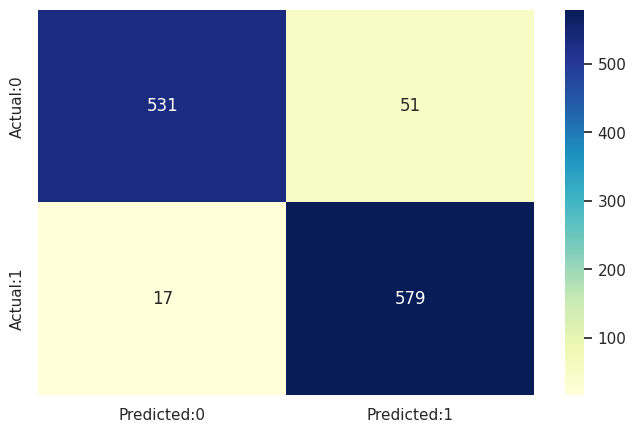

In [ ]:
%%time

apply_model(svm_clf, X_train, y_train, X_test, y_test)

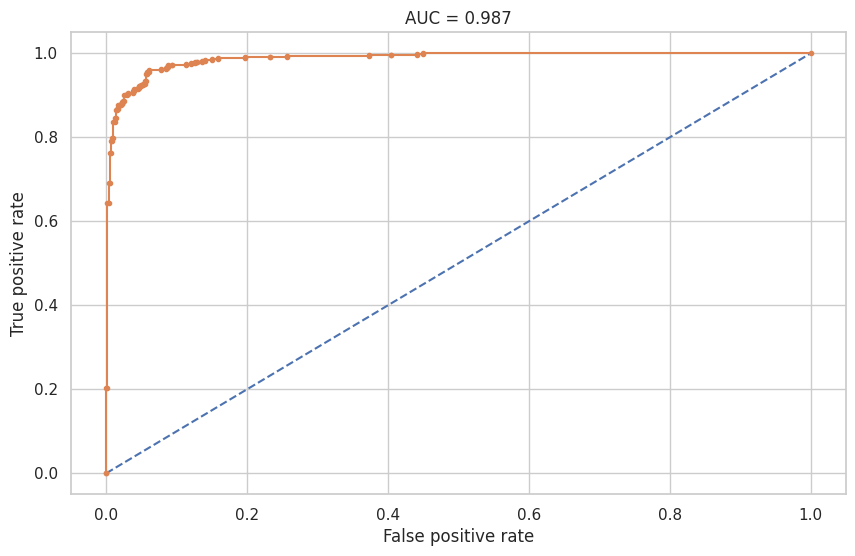

In [ ]:
error_plot(svm_clf, X_train, y_train, X_test, y_test)

## <b> 8.5] Evaluating Model Perfomances

In [ ]:
# Ensure all lists have the same length
# F1_score is likely the culprit since it wasn't initialized
# with any values like the other lists.
F1_score = [0] * len(M_list)  # Initialize F1_score with the same length as M_list


eval_df = pd.DataFrame({'Models': M_list,
                        'Test Accuracy': Test_accuracy_score,
                        'Precision': Precision_score,
                        'Recall': Recall_score,
                        'F1 score': F1_score,  # Now with the correct length
                        'AUC': AUC,
                        })

In [ ]:
eval_df = pd.DataFrame({'Models': M_list,
                        'Test Accuracy': Test_accuracy_score,
                        'Precision': Precision_score,
                        'Recall': Recall_score,
                        'F1 score': F1_score,
                        'AUC': AUC,
                        })

In [ ]:
eval_df

,Models,Test Accuracy,Precision,Recall,F1 score,AUC
0,logistic_clf,0.65,0.65,0.65,0,0.69
1,random_clf,0.69,0.69,0.71,0,0.78
2,xgb_clf,0.68,0.68,0.70,0,0.78
3,svm_clf,0.94,0.92,0.97,0,0.99


Observation from above table:
* **XG Boost**, **Support vector machine** gives highest Accuracy, Recall, Precision and AUC score.
* Highest recall is given by **Support vector machine**
* Highest AUC is given by **Support vector machine**

Overall we can say that **Support vector machine** is the best model that can be used for the risk prediction of Cardiovascular heart disease.

Lets validate our evaluation with some plots.

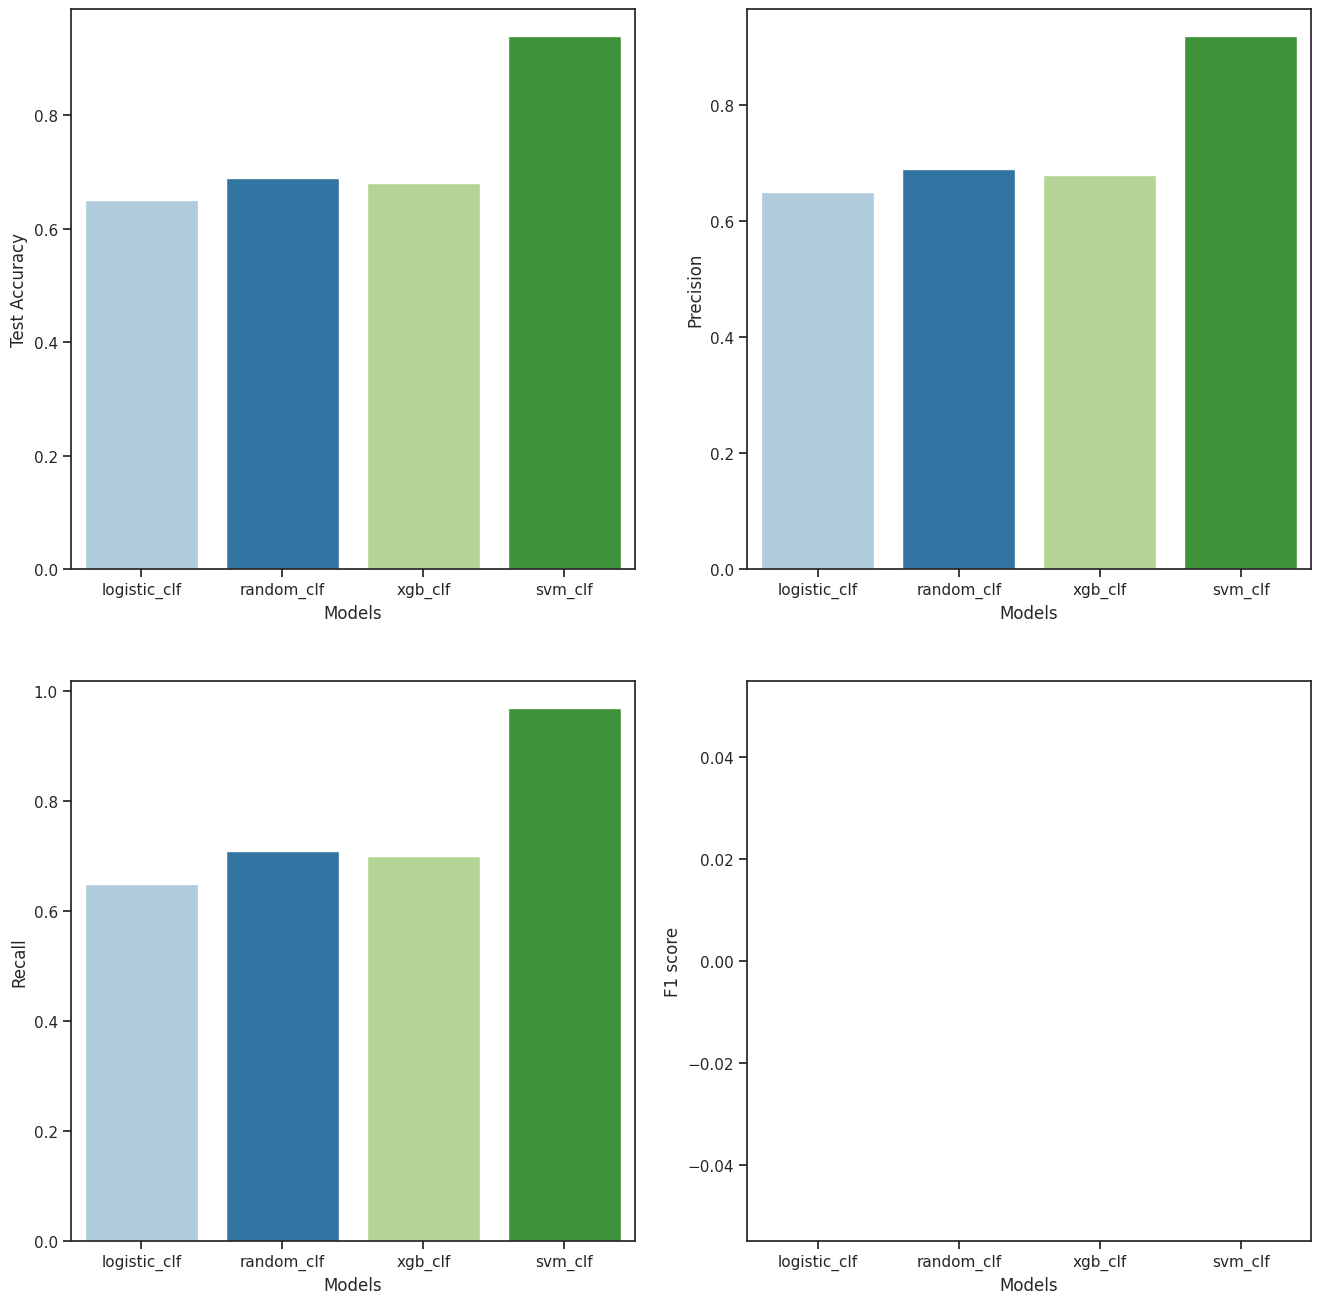

In [ ]:
# Visualisation for all scores

f = plt.figure(figsize=(16, 16))  # Set Plot size
gs = f.add_gridspec(2, 2)  # Set Grid Structure

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 0])  # Frist subplot index starts with 0
    #sns.set(rc={'figure.figsize':(8,8)})
    sns.barplot(data=eval_df, x="Models", y="Test Accuracy", palette ="Paired");

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 1])  # Second Plot
    #sns.set(rc={'figure.figsize':(8,8)})
    sns.barplot(data=eval_df, x="Models", y="Precision", palette ="Paired");

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])  # Third plot
    #sns.set(rc={'figure.figsize':(8,8)})
    sns.barplot(data=eval_df, x="Models", y="Recall", palette ="Paired");

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 1])  # Fourth plot
    #sns.set(rc={'figure.figsize':(8,8)})
    sns.barplot(data=eval_df, x="Models", y="F1 score", palette ="Paired");

* From above plots we can see that the Test accuracy and Precision are almost same as they very less distinct from each other due to close values.
* Maximum Accuracy we can clearly see for SVM model.
* SVM's F1 score and Recall score is higthest among all.


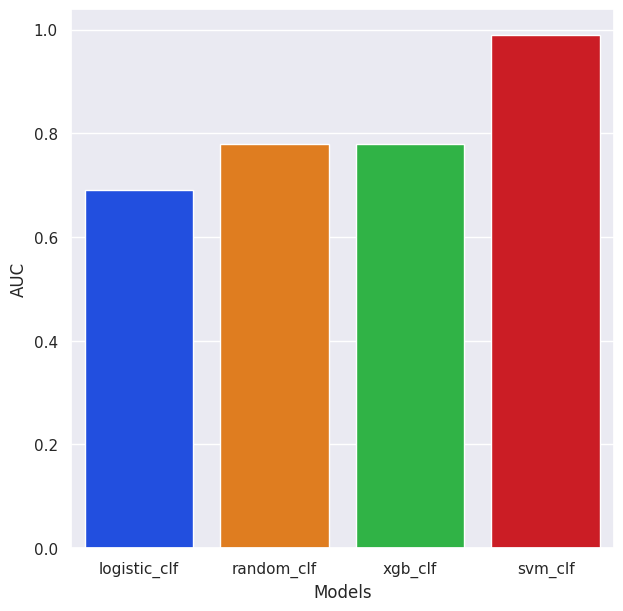

In [ ]:
# Plot for AUC score
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(data=eval_df, x="Models", y="AUC", palette ="bright");

* From both the graphs we can say that the best performing model is **Support Vector Machine** algorithm.

# <b> 09 Conclusion

* Risk of Cardiovascular heart disease is almost equal between the smokers and non- smokers and same goes with gender it is pretty much same for both male and females.
* Correlation obtained is very poor for this dataset but still due to tuned parameters and strong classification algorithms model efficiency obtained is about 93%.
* The top contributing features in predicting the ten year risk of developing Cardiovascular Heart Disease are 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'.
* The Support vector machine with the radial kernel is the best performing model in terms of accuracy and the F1 score and Its high
* AUC-score shows that it has a high true positive rate.
* Balancing the dataset by using the SMOTE technique helped in improving the models' sensitivity.
* With more data & with more correlated features better models can be built.